## The general idea for my statistic is that the best neighborhood will have the least amount of traffic.

In [145]:
# load pandas
import pandas as pd
from matplotlib import pyplot as plt

#open csv file
traffic_count_csv = pd.read_csv("traffic_count.csv", sep=",")
traffic_count_csv
#grab only specific columns I need
traffic_count = traffic_count_csv[['device_id','average_daily_car_traffic','neighborhood','count_end_date']]
#traffic_count



## Performing data cleaning on my dataset. Removing all NULL characters.

In [146]:
#performing cleaning operations on dataset
traffic_count.dropna(inplace=True)

#traffic_count.dropna(axis='index', how='any', subset=['average_daily_car_traffic'])
#traffic_count.dropna()

traffic_count.sort_values(by='count_end_date', ascending=True)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,device_id,average_daily_car_traffic,neighborhood,count_end_date
52,37,976.0,Greenfield,2018-06-21
109,39,5327.0,Highland Park,2018-07-11
17,36,7688.0,Highland Park,2018-07-12
3,9,2741.0,Squirrel Hill South,2018-08-01
10,8,5592.0,Squirrel Hill South,2018-08-01
...,...,...,...,...
224,242,3819.0,Homewood South,2020-02-22
226,244,2651.0,Point Breeze North,2020-02-22
222,240,5357.0,Homewood North,2020-02-22
223,241,6446.0,Homewood South,2020-02-22


In [147]:
#read columns into dictionary
traffic_count_dict = {}
#length = traffic_count.count()[0]
length = len(traffic_count.index)
#print(length)
counter = 0
while not counter >= length:
    row = traffic_count.iloc[counter]
    
    """
    To clarify on a few points here, I am doing this in a very backwards way, or at least it feels like I am.
    Anyway, the "row" variable is being used as a sort of "pointer" to grab data from each column using a 0, 1, 2, etc.
    In this specific instance, I only have two columns. 0 being average_daily_car_traffic, and 1 being neighborhood. This is how
    I am grabbing the data from each column for every row.
    This will only save the most RECENT data, since I am sorting the dataset before I am performing this by "count_end_date" ascending.
    """
    traffic_count_dict[row[0]] = row[1], row[2]
    
    #increasing counter by one
    counter+=1
        

## Show all information that has been sorted into dictionary.

In [ ]:
for key,value in traffic_count_dict.items():
    print(str(key) + ": " + str(value))

## Top 5-10 light traffic areas

In [148]:
traffic_count_series = pd.Series(traffic_count_dict)

traffic_count_series.sort_values(ascending=True)[:10]


traffic_count.sort_values(['average_daily_car_traffic', 'count_end_date'], ascending=[True, False], inplace=True)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Graph of data in bar graph style.

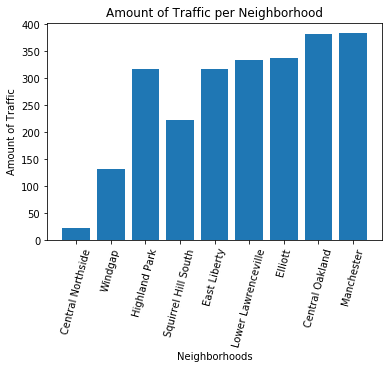

In [149]:
plt.bar(traffic_count['neighborhood'][:10], traffic_count['average_daily_car_traffic'][:10])
plt.xlabel('Neighborhoods')
plt.ylabel('Amount of Traffic')
plt.title('Amount of Traffic per Neighborhood')
plt.xticks(rotation=75)

plt.show()